![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [231]:
# Start your code here!
import pandas as pd

In [232]:
# Import hypothesis testing from scipy.stats
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

# Load the datasets
women_results = pd.read_csv('women_results.csv')
men_results = pd.read_csv('men_results.csv')

In [233]:
# Import hypothesis testing from scipy.stats
from scipy.stats import ttest_ind

# Load the datasets
women_results = pd.read_csv('women_results.csv')
men_results = pd.read_csv('men_results.csv')

# Convert 'date' column to datetime
women_results['date'] = pd.to_datetime(women_results['date'])
men_results['date'] = pd.to_datetime(men_results['date'])

# Filter the datasets for FIFA World Cup matches since 2002-01-01
# Override DataFrame variable
women_results = women_results[(women_results['tournament'] == 'FIFA World Cup') & (women_results['date'] >= '2002-01-01')]
men_results = men_results[(men_results['tournament'] == 'FIFA World Cup') & (men_results['date'] >= '2002-01-01')]

# Add total_goals column in each dataset
women_results['total_goals'] = women_results['home_score'] + women_results['away_score']
men_results['total_goals'] = men_results['home_score'] + men_results['away_score']

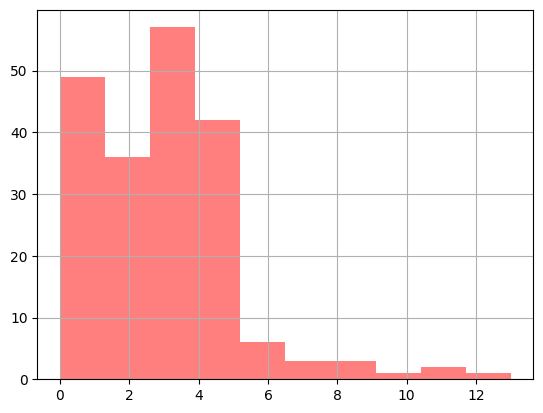

In [234]:
# Check normality
women_results['total_goals'].hist(alpha=0.5, color='red')
plt.show()

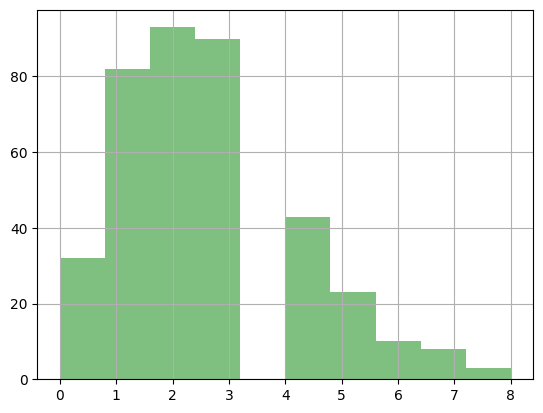

In [235]:
# Check normality
men_results['total_goals'].hist(alpha=0.5, color='green')
plt.show()

In [236]:
# Calculate the mean number of goals scored in women's and men's matches
women_mean_goals = women_results['total_goals'].mean()
men_mean_goals = men_results['total_goals'].mean()

print("Average goals in Women's matches:", women_mean_goals, "goals")
print("Average goals in Men's matches:", men_mean_goals, "goals")

Average goals in Women's matches: 2.98 goals
Average goals in Men's matches: 2.5130208333333335 goals


In [237]:
# Perform right-tailed Wilcoxon-Mann-Whitney test with scipy
t_stat, p_val = ttest_ind(women_results["total_goals"],
                          men_results["total_goals"],
                          alternative="greater")

# Extract p-value as a float
p_val = scipy_test.pvalue
print("p-value:", p_val)

p-value: 0.005106609825443641


In [238]:
# Perform test on p_val
if p_val <= 0.10:
    result = "reject"
else:
    result = "fail to reject"

# Store the p-value and result in a dictionary
result_dict = {"p_val": p_val, "result": result}

print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}


## Conclusion
P-value rejects the hypothesis that the total women's goal scored is the same as men's. Therefore, it is concluded that the **Women's matches garners more goals than Men's during FIFA World Cup tournaments since January 1, 2002.**